In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)


import time as time

# -------------- SET UP YOUR PATH ------------
import sys
# sys.path.append("~/OneDrive/ExtendedProject/Code/Weak SDE approximation/C++")
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 17}

# matplotlib.rc('font', **font)
import pandas as pd
import scipy.integrate as integrate
## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:


def plot_evolving(df_noada,df_rescale,df_transfo):

    list_step=df_noada['count'].unique()
    ## Set up the plots 
    fig, ((axs))= plt.subplots(2,len(list_step),figsize=(25,10))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('underdamped-evolving distributions M='+str(M)+', m=' +str(m)+", $\gamma=$"+str(gamma)+", $\\tau$="+str(tau), fontsize=25)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    b_p=3 #bounds for p distr
    b_q=2.5
    ## Loop through the values 
    for i in range(len(list_step)):
        
        # List of time
        counti = list_step[i]

        ### NOT ADAPTIVE
        df_noada_i=df_noada[df_noada['count']==counti]
        # --- No ada
        histogram,bins = np.histogram(df_noada_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='SDE',color="red")
        
        histogram,bins = np.histogram(df_noada_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='SDE',color="red")
        
    
        # --- Transformed SDE
        df_transfo_i=df_transfo[df_transfo['count']==counti]
        histogram,bins = np.histogram(df_transfo_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='transformed SDE',color="green")

        histogram,bins = np.histogram(df_transfo_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='transformed SDE',color="green")


        # --- Rescaled time
        df_rescale_i=df_rescale[df_rescale['count']==counti]
        histogram,bins = np.histogram(df_rescale_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='rescaled time',color="blue")
        axs[0,i].set_ylabel("Q")

        histogram,bins = np.histogram(df_rescale_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='rescaled time',color="blue")
        axs[1,i].set_ylabel("P")

        # --- P invariant
        rho = np.exp(- (midx_p**2)/(2*tau))
        rho = rho / ( np.sum(rho)* (midx_p[1]-midx_p[0]) ) # Normalize rho by dividing by its approx. integral
        axs[1,i].plot(midx_p,rho,'--',label='Truth',color="orange")

        # --- Q invariant
        rho = np.exp(- U(midx_q)/tau)
        rho = rho / ( np.sum(rho)* (midx_q[1]-midx_q[0]) ) # Normalize rho by dividing by its approx. integral
        axs[0,i].plot(midx_q,rho,'--',label='invariant',color="orange")

        axs[0,i].set_title("steps="+str(np.round(Ntl[i],0)),fontsize= 20)

        # parameters of axis
        axs[0,i].set_ylim([0, 4])
        axs[1,i].set_ylim([0, 1.5])



    axs[0,len(list_step)-1].legend(loc='lower center',bbox_to_anchor=(-5, 1.06),
            ncol=5, fancybox=True, shadow=True)


    fig.savefig('evolving_distrM'+str(M)+"m"+str(m)+"Nt"+str(500)+"h"+str(h)+"tau"+str(tau)+".png")

def plot_distr_Tfgpgdt(df_rescale,df_transfo):
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)

    ## Set up the plots 
    fig, ((ax1,ax2,ax3))= plt.subplots(1,3,figsize=(10,5))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    var = tf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax1.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Rescaled",alpha=0.5)
    # ax1.set_ylim([0,0.8])
    ax1.set_title("Final time reached with EM applied \nto SDE with rescaled time", fontsize=15)
    ax1.set_ylabel("$T_f$")

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)

    var = gpf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="transformed",alpha=0.5)
    # ax2.set_ylim([0,1])
    ax2.set_ylabel("$g'(x)$")
    ax2.set_title("$g'(x)$", fontsize=15)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)

    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="trasnformed",alpha=0.5)
    # ax3.set_ylim([0,300])
    ax3.set_ylabel("$g(x)$")
    ax3.set_title("$g(x)$", fontsize=15)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_rescale)

    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="rescale",alpha=0.5)
    ax3.legend(loc='lower center',bbox_to_anchor=(-5, 1.06),
            ncol=1, fancybox=True, shadow=True)

def plot_distr_Tfgpgdt(df_rescale,df_transfo):
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)

    ## Set up the plots 
    fig, ((ax1,ax2,ax3))= plt.subplots(1,3,figsize=(10,5))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    var = tf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax1.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescaled",alpha=0.5)
    ax1.set_ylabel("$T_f$")


    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)
    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="transformed",alpha=0.5)
    ax2.set_ylabel("$g(x)$")

    spacing = 0.5
    minorLocator = MultipleLocator(spacing)
    # Set minor tick locations.
    ax2.yaxis.set_minor_locator(minorLocator)
    ax2.xaxis.set_minor_locator(minorLocator)
    # Set grid to use minor tick locations. 
    ax2.grid(which = 'minor')

    
    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_rescale)
    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="rescaled",alpha=0.5)
    ax2.legend(loc='lower center',bbox_to_anchor=(2, 1.06),
            ncol=1, fancybox=True, shadow=True)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)
    var = gpf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
    ax3.set_ylabel("$g'(x)$")

def look_final_distr(df_noada,df_rescale,df_transfo):
    fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(16,6))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)

    fig.suptitle("$\\beta$="+str(tau)+", $\\gamma=$"+str(gamma))

    # No ada 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_noada)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='sde',color="red")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='sde',color="red")

    # Ada transfo 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_transfo)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='transformed sde',color="green")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='transformed sde',color="green")

    # Rescale 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='rescaled',color="blue")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='rescaled',color="blue")

    ### position q invariant
    rho = np.exp(- U(midx_q)/tau)
    rho = rho / ( np.sum(rho)* (midx_q[1]-midx_q[0]) ) # Normalize rho by dividing by its approx. integral
    ax1.plot(midx_q,rho,'--',label='invariant',color="orange")
    #ax1.legend() 

    ### momentum p invariant
    rho = np.exp(-(midx_p**2)/(2*tau))
    rho = rho / ( np.sum(rho)* (midx_p[1]-midx_p[0]) ) # Normalize rho by dividing by its approx. integral
    ax2.plot(midx_p,rho,'--',label='invariant',color="orange")

    ax2.legend(loc='lower center',bbox_to_anchor=(-0.4, -.25),
            ncol=4, fancybox=True, shadow=True)


### Try with a potential designed to have a small portion that is steep (tailored made potential)


The potential becomes: 
$$
V(x) = - \frac{1}{1+\exp(xK)}+0.1x^2
$$
and then 
$$
V'(x) = \frac{K\exp(Kx)}{(\exp(Kx)+1)^2}+0.1x
$$





<ipython-input-3-85d992238c51>:10: RuntimeWarning: overflow encountered in power
  Up=(K*np.exp(K*x))/np.power((np.exp(K*x)+1),2)+0.2*x


Text(0.5, 1.0, "V'(x)")

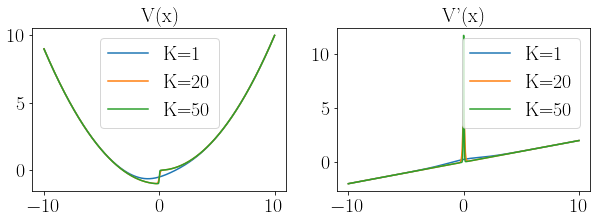

In [3]:
s = np.linspace(-10,10,1000)
K=10
a=0
b=0
def pot_sig(s,K):
    fs =-1/(1+np.exp((s-a)*K))+0.1*(s-b)**2
    return fs

def Up(x,K):
    Up=(K*np.exp(K*x))/np.power((np.exp(K*x)+1),2)+0.2*x
    return Up


fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(10,3))# plt.figure(figsize=(4,4))

K=1
ax1.plot(s,pot_sig(s,K),label="K="+str(K))
K=20
ax1.plot(s,pot_sig(s,K),label="K="+str(K))
K=50
ax1.plot(s,pot_sig(s,K),label="K="+str(K))

K=1
ax2.plot(s,Up(s,K),label="K="+str(K))
K=20
ax2.plot(s,Up(s,K),label="K="+str(K))
K=50
ax2.plot(s,Up(s,K),label="K="+str(K))

ax1.legend()
ax1.set_title("V(x)")
ax2.legend()
ax2.set_title("V'(x)")

The issue with that is that the posterior is not defined outside of [0,1] which means troubles for the discretisation

### Non adaptive SDE : evaluate the behaviours with regards to K, tau gamma and dt. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numba import jit,njit,vectorize, float64, int32
import numba as nb
import time as time
##############################
# Define some global variables
##############################

snap = 10

@njit(float64(float64,float64))
def Up(x,K):
    Up=(K*np.exp(K*x))/np.power((np.exp(K*x)+1),2)+0.2*x
    return Up

# @njit(float64(float64,float64,float64,float64))
# def getg(mu,M,m,K): #,dtmin, dtmax, R):
#     Kt2=2*K
#     fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
#     g = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
#     return g

# @njit(float64(float64,float64,float64,float64))
# def getgprime(mu,M,m,K):
#     Kt2=2*K
#     mua2kminus1=np.power((mu-a),(Kt2-1))
#     fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
#     fxprime=-Kt2*(Kt2-1)*np.power((mu-a),(Kt2-2))-N
#     gprime = -fx*fxprime/np.power(fx*fx+m*m,1.5)
#     return gprime

@njit(float64[:,:](float64[:],float64,float64,float64,float64,float64))
def one_traj_adaNTest(qp,Nt,dt,gamma,tau,K):
    t=0
    q=qp[0]
    p=qp[1]

    #set up vectors to save results 
    size_save = snap
    tqpg_list = np.zeros((size_save,5))
    save_i=0 

    #useful things to compute for first step
    f = -Up(q,K)
    g = 1
    # if include_ada==1:     #Transformed SDE
    #     g=getg(q,M,m,K)
    #     gp=getgprime(q,M,m,K)
    # elif include_ada==2:     # Rescaled SDE
    #     g=getg(q,M,m,K)

    gdt=g*dt

    for count in range(Nt):

        #**********
        #* STEP B *
        #**********
        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        # if include_ada==1:
        #     p += 0.5*dt*tau*gp

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP O *
        #**********
        dB = np.random.normal(0,1)
        C =np.exp(-gdt*gamma) 
        p = C*p+ np.sqrt((1-C*C)*tau)*dB

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP B *
        #**********
        # Need to compute new quantities for f and g 
        f = -Up(q,K)
        g=1                    # Normal SDE                
        # if include_ada==1:     # Transformed SDE
        #     g=getg(q,M,m,K)
        #     gp=getgprime(q,M,m,K)
        # elif include_ada==2:   # Rescaled SDE
        #     g=getg(q,M,m,K)
    
        gdt=g*dt

        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        # if include_ada==1:
        #     p += 0.5*dt*tau*gp

        #*********************************
        #* Save (p,q) and update time and*
        #*********************************
        if count==int(Nt/snap*save_i):
            tqpg_list[save_i,0]=t
            tqpg_list[save_i,1]=q
            tqpg_list[save_i,2]=p
            # if include_ada==1:
            #     tqpg_list[save_i,3]=gp
            # else:
            #     tqpg_list[save_i,3]=0
            tqpg_list[save_i,4]=g
            save_i+=1
        
        #* change the clock for the transformed SDE, move time forward using gdt.
        #* resulting in using gdt for all schemes
        #***********************************************************************
        # if include_ada==0:
        #     t+=dt
        # else:
        t+=gdt
    return(tqpg_list)

@njit(parallel=True)
def method_baoab_ada(n_samples,gamma,tau,Nt,h,K):
    nsample_pertraj = snap
    tqpg_list=np.zeros((n_samples*nsample_pertraj,6))
    ones_nsample=np.ones(nsample_pertraj)
    for j in nb.prange(n_samples):
        qi =np.random.uniform(0.5,1) #np.abs(np.random.normal(0,1,2)) #initial conditions np.array([2.0,0.0]) 
        pi=np.random.uniform(0.5,1)
        qipi=np.array([qi,pi])
        qp_samples = one_traj_adaNTest(qipi,Nt,h,gamma,tau,K)
        start_i = nsample_pertraj*j
        end_i = nsample_pertraj*(j+1)
        tqpg_list[start_i:end_i,1:6]=qp_samples
        tqpg_list[start_i:end_i,0]=ones_nsample*j
    return(tqpg_list)

#compile the method
test = method_baoab_ada(1,0.1,0.1,1000,0.001,1)

In [5]:
def get_final(qp):
    df = pd.DataFrame(qp,columns=["sim","t","Q","P","gp","g"]) #Create a dataset with only the final time
    idx = df.groupby(['sim'])['t'].transform(max) == df['t'] #Get the indexes of the final time
    final_df=df[idx] #Select only dataset with final time
    qf_list,pf_list,gf_list,tf_list = np.array(final_df["Q"]), np.array(final_df["P"]), np.array(final_df["gp"]), np.array(final_df["t"]) #Get numpy arrays of the final values 
    return qf_list, pf_list
get_final(test)

(array([1.13544295]), array([0.24577763]))

Example 1, percentage of nan trajectories: 

0.0


Example 2, percentage of nan trajectories:
0.0


Example 3, percentage of nan trajectories:
0.0


Example 3, percentage of nan trajectories:
0.0


Example 3, percentage of nan trajectories:
0.0


Example 6, percentage of nan trajectories:
0.0




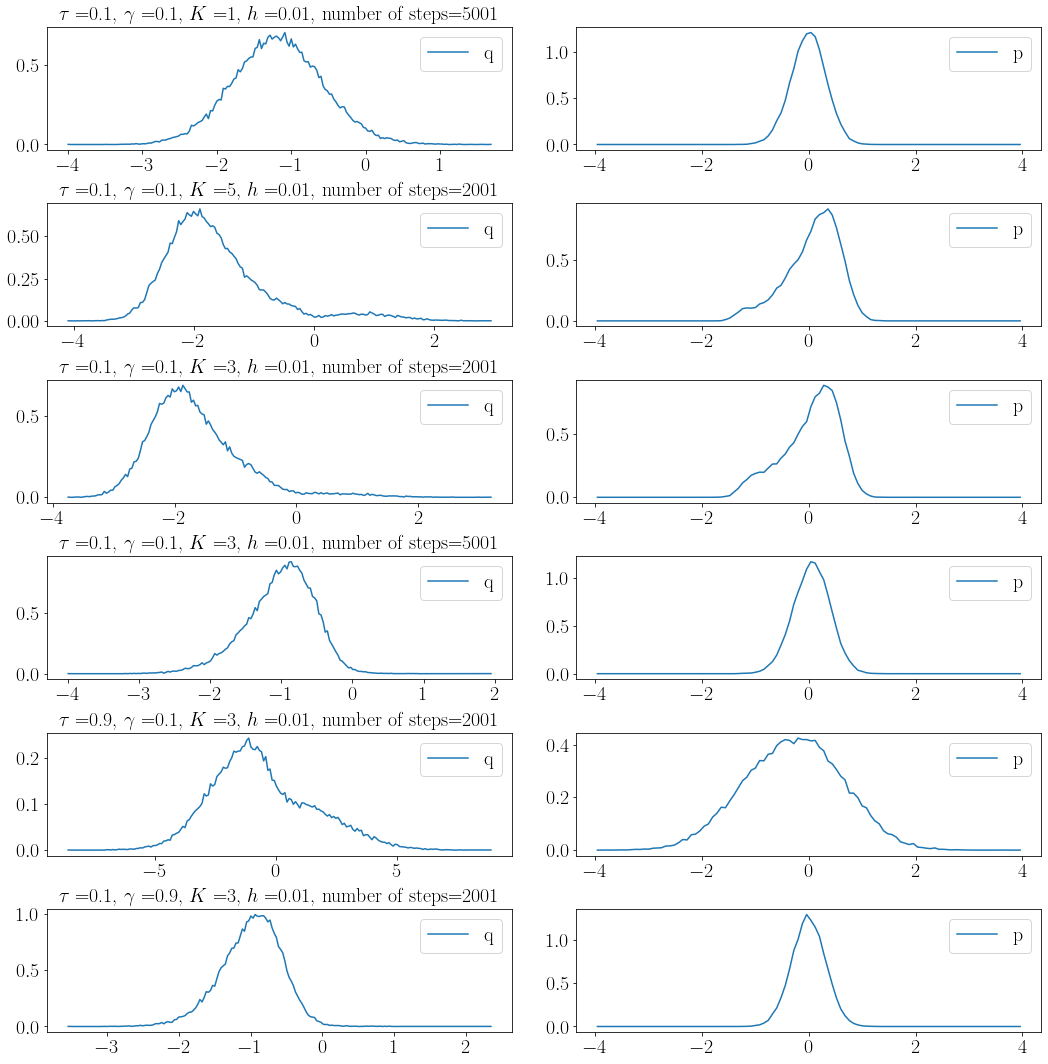

In [6]:

fig, (axs)= plt.subplots(6, 2,figsize=(15,15))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.tight_layout()
############################################################################################
# Example 1: ###############################################################################
############################################################################################
i=0
gamma = 0.1
tau=0.1
T=50
h=0.01
n_samples=50000
Ntimes=int(T*1/h)+1
K=1
count_i=10
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 1, percentage of nan trajectories: \n")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")

qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False], 
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 2: ###############################################################################
############################################################################################
i=1
gamma = 0.1
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=5
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 2, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

# ############################################################################################
# # Example 3: ###############################################################################
# ############################################################################################
i=2
gamma = 0.1
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 3, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 4: ###############################################################################
############################################################################################
i=3
gamma = 0.1
tau=0.1
T=50
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 3, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()


############################################################################################
# Example 5: ###############################################################################
############################################################################################
i=4
gamma = 0.1
tau=0.9
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 3, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 6: ###############################################################################
############################################################################################
i=5
gamma = 0.9
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 6, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()


Now the potential is defined everywhere, and sometimes it is really steep. 

### Adaptive SDE
#### Design of function g(x) and g'(x)

In this case we use: 
$$
f(x) = V'(x) =  \frac{K\exp(Kx)}{(\exp(Kx)+1)^2}+0.2x
$$
and then 
$$
f'(x) = V''(x) =  \frac{K^2 \exp(Kx)}{\left(1+\exp(Kx) \right)^2} - \frac{2K^2\exp(2Kx)}{(1+\exp(Kx))^3}+0.2
$$


such that 
$$
g(x) = 1/M + 1/(\sqrt{\|f^2(x)\| + m^2})
$$
and 
$$
g'(x) = \frac{f(x) f'(x)}{(f^2(x)+m^2)^{3/2}}
$$

(0.01, 10.0)

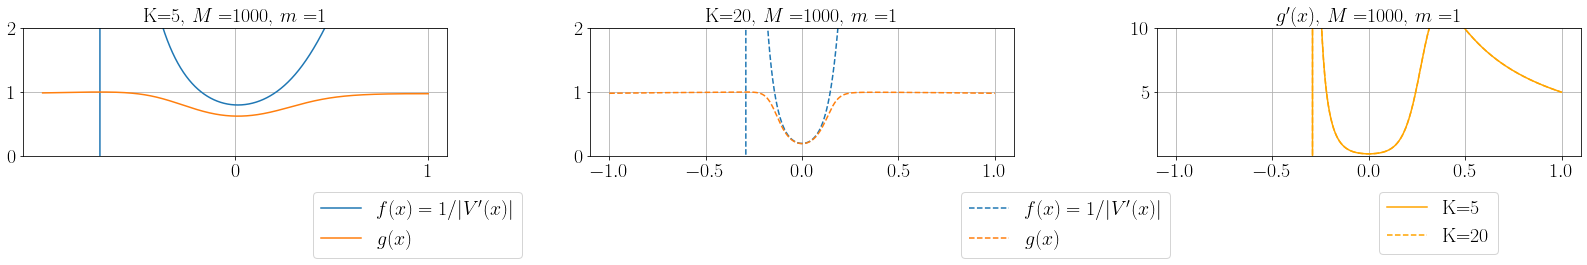

In [40]:
m=1

M=1000
fig, ((ax1,ax2,ax3))= plt.subplots(1, 3,figsize=(25,5))# plt.figure(figsize=(4,4))
fig.tight_layout(pad=5)

#Data
np.random.seed(11)
N=1
X = np.random.normal(1.5,1,N)
a = 2
K1=5
K2=20
x = np.linspace(-1.,1,10000)

def getfplot(x,K):
    fx = K*np.exp(K*x)/np.power((np.exp(K*x)+1),2)+0.2*x
    return 1/fx

def getgplot(x,K):
    fx=K*np.exp(K*x)/np.power((np.exp(K*x)+1),2)+0.2*x
    res = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return res

def getfprime(x,K):
    fxprime = (K*K*np.exp(K*x))/np.power((1+np.exp(K*x)),2) - (2*K*K*np.exp(2*K*x))/np.power((1+np.exp(K*x)),3)+0.2
    return fxprime

def getgprime(x,K):
    fx=K*np.exp(K*x)/np.power((np.exp(K*x)+1),2)+0.2*x
    fxprime = (K*K*np.exp(K*x))/np.power((1+np.exp(K*x)),2) - (2*K*K*np.exp(2*K*x))/np.power((1+np.exp(K*x)),3)+0.2
    res = -fx*fxprime/np.power(fx*fx+m*m,1.5)
    return res

### Grid 

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 10, 1)
minor_ticks = np.arange(0, 10, 1)

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.set_yticks(major_ticks)
ax1.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax1.grid(which='both')


K=K1
ax1.plot(x,getfplot(x,K),label="$f(x) = 1/|V'(x)|$")
ax1.plot(x,getgplot(x,K),label="$g(x)$")
# ax1.set_yscale("log")
ax1.legend(bbox_to_anchor=[1.2, -.2])
ax1.set_title("K="+str(K1)+", $M=$"+str(M)+", $m=$"+str(m))
ax1.set_ylim([0,2])
# ax1.grid()

K=K2
ax2.plot(x,getfplot(x,K),"--",label="$f(x) = 1/|V'(x)|$")
ax2.plot(x,getgplot(x,K),"--",label="$g(x)$")
# ax2.set_yscale("log")
ax2.legend(bbox_to_anchor=[0.85, -.2])
ax2.set_title("K="+str(K2)+", $M=$"+str(M)+", $m=$"+str(m))
ax2.set_ylim([0,2])
ax2.grid(which='both')


ax3.plot(x,getfplot(x,K),color="orange",label="K="+str(K1))
# ax3.set_yscale("log")
ax3.set_title("$g'(x)$")
ax3.grid(which='both')

ax3.plot(x,getfplot(x,K),"--",color="orange",label="K="+str(K2))
ax3.legend(bbox_to_anchor=[0.5, -.2])
ax3.set_title("$g'(x)$"+", $M=$"+str(M)+", $m=$"+str(m))
ax3.set_ylim([0.01,10])


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numba import jit,njit,vectorize, float64, int32
import numba as nb
import time as time
##############################
# Define some global variables
##############################

snap = 10

## Parameter of the function 
N=1
np.random.seed(11)

@njit(float64(float64,float64))
def Up(x,K):
    Up=(K*np.exp(K*x))/np.power((np.exp(K*x)+1),2)+0.2*x
    return Up

@njit(float64(float64,float64,float64,float64))
def getg(x,M,m,K):
    fx=K*np.exp(K*x)/np.power((np.exp(K*x)+1),2)+0.2*x
    res = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return res

@njit(float64(float64,float64,float64,float64))
def getgprime(x,M,m,K):
    fx=K*np.exp(K*x)/np.power((np.exp(K*x)+1),2)+0.2*x
    fxprime = (K*K*np.exp(K*x))/np.power((1+np.exp(K*x)),2)-(2*K*K*np.exp(2*K*x))/np.power((1+np.exp(K*x)),3)+0.2
    res = -fx*fxprime/np.power(fx*fx+m*m,1.5)
    return res

@njit(float64[:,:](float64[:],float64,float64,float64,float64,int32,float64,float64,float64))
def one_traj_adaNTest(qp,Nt,dt,gamma,tau,include_ada,M,m,K):
    t=0
    q=qp[0]
    p=qp[1]

    #set up vectors to save results 
    size_save = snap
    tqpg_list = np.zeros((size_save,5))
    save_i=0 

    #useful things to compute for first step
    f = -Up(q,K)
    g = 1
    if include_ada==1:     #Transformed SDE
        g=getg(q,M,m,K)
        gp=getgprime(q,M,m,K)
    elif include_ada==2:     # Rescaled SDE
        g=getg(q,M,m,K)

    gdt=g*dt

    for count in range(Nt):

        #**********
        #* STEP B *
        #**********
        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        if include_ada==1:
            p += 0.5*dt*tau*gp

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP O *
        #**********
        dB = np.random.normal(0,1)
        C =np.exp(-gdt*gamma) 
        p = C*p+ np.sqrt((1-C*C)*tau)*dB

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP B *
        #**********
        # Need to compute new quantities for f and g 
        f = -Up(q,K)
        g=1                    # Normal SDE                
        if include_ada==1:     # Transformed SDE
            g=getg(q,M,m,K)
            gp=getgprime(q,M,m,K)
        elif include_ada==2:   # Rescaled SDE
            g=getg(q,M,m,K)
    
        gdt=g*dt

        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        if include_ada==1:
            p += 0.5*dt*tau*gp

        #*********************************
        #* Save (p,q) and update time and*
        #*********************************
        if count==int(Nt/snap*save_i):
            tqpg_list[save_i,0]=t
            tqpg_list[save_i,1]=q
            tqpg_list[save_i,2]=p
            if include_ada==1:
                tqpg_list[save_i,3]=gp
            else:
                tqpg_list[save_i,3]=0
            tqpg_list[save_i,4]=g
            save_i+=1
        
        #* change the clock for the transformed SDE, move time forward using gdt.
        #* resulting in using gdt for all schemes
        #***********************************************************************
        if include_ada==0:
            t+=dt
        else:
            t+=gdt
    return(tqpg_list)

@njit(parallel=True)
def method_baoab_ada(n_samples,gamma,tau,Nt,h,include_ada,M,m,K):
    nsample_pertraj = snap
    tqpg_list=np.zeros((n_samples*nsample_pertraj,6))
    ones_nsample=np.ones(nsample_pertraj)
    for j in nb.prange(n_samples):
        qi =np.random.uniform(0.5,1) #np.abs(np.random.normal(0,1,2)) #initial conditions np.array([2.0,0.0]) 
        pi=np.random.uniform(0.5,1)
        qipi=np.array([qi,pi])
        qp_samples = one_traj_adaNTest(qipi,Nt,h,gamma,tau,include_ada,M,m,K)
        start_i = nsample_pertraj*j
        end_i = nsample_pertraj*(j+1)
        tqpg_list[start_i:end_i,1:6]=qp_samples
        tqpg_list[start_i:end_i,0]=ones_nsample*j
    return(tqpg_list)

#compile the method
test = method_baoab_ada(1,0.1,0.1,1,0.1,0,1,0.5,1)

In [82]:
##########################################################################
## Example 1 
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=100
h=0.01
Ntimes=int(T*1/h)+1
K=8
M=1000
m=0.5
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","t","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","t","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=200
hno=0.01
Ntimes=int(T1_long*1/hno)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,hno,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau1, gamma1, K1, h1, T1, M1, m1 = tau, gamma, K, h, T, M, m
df_noada1 = df_noada
df_noada_T501 = df_noada_T50
df_transfo1 = df_transfo
df_rescale1 = df_rescale

CPU times: user 2min 7s, sys: 83.4 ms, total: 2min 7s
Wall time: 12.3 s
CPU times: user 4min 52s, sys: 158 ms, total: 4min 52s
Wall time: 25.4 s
CPU times: user 2min 58s, sys: 116 ms, total: 2min 59s
Wall time: 15.5 s
CPU times: user 4min 21s, sys: 166 ms, total: 4min 22s
Wall time: 23.2 s


In [83]:
##########################################################################
## Example 2
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=30
h=0.01
Ntimes=int(T*1/h)+1
K=3
M=1000
m=0.9
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau1,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","t","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","t","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=200
hno=0.01
Ntimes=int(T1_long*1/hno)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,hno,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau2, gamma2, K2, h2, T2, M2, m2 = tau, gamma, K, h, T, M, m
df_noada2 = df_noada
df_noada_T502 = df_noada_T50
df_transfo2 = df_transfo
df_rescale2 = df_rescale

CPU times: user 41.7 s, sys: 29.5 ms, total: 41.7 s
Wall time: 5.08 s
CPU times: user 1min 35s, sys: 75.2 ms, total: 1min 35s
Wall time: 10.1 s
CPU times: user 58.6 s, sys: 65.4 ms, total: 58.7 s
Wall time: 5.9 s
CPU times: user 4min 26s, sys: 104 ms, total: 4min 26s
Wall time: 26.2 s


In [84]:
##########################################################################
## Example 3
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=100
h=0.1
Ntimes=int(T*1/h)+1
K=3
M=1000
m=0.9
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau1,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","t","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","t","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=200
hno=0.01
Ntimes=int(T1_long*1/hno)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,hno,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau3, gamma3, K3, h3, T3, M3, m3 = tau, gamma, K, h, T, M, m
df_noada3 = df_noada
df_noada_T503 = df_noada_T50
df_transfo3 = df_transfo
df_rescale3 = df_rescale

CPU times: user 13.4 s, sys: 47.8 ms, total: 13.4 s
Wall time: 1.31 s
CPU times: user 30.5 s, sys: 49.7 ms, total: 30.6 s
Wall time: 3.06 s
CPU times: user 19.2 s, sys: 45.9 ms, total: 19.3 s
Wall time: 2.02 s
CPU times: user 4min 9s, sys: 152 ms, total: 4min 9s
Wall time: 22.7 s


In [75]:
##########################################################################
## Example 4
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=30
h=0.4
Ntimes=int(T*1/h)+1
K=8
M=1000
m=0.9
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau1,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","t","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","t","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
hno=0.01
Ntimes=int(T1_long*1/hno)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,hno,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","t","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau4, gamma4, K4, h4, T4, M4, m4 = tau, gamma, K, h, T, M, m
df_noada4 = df_noada
df_noada_T504 = df_noada_T50
df_transfo4 = df_transfo
df_rescale4 = df_rescale

CPU times: user 1.8 s, sys: 4.33 ms, total: 1.81 s
Wall time: 191 ms
CPU times: user 2.6 s, sys: 36 ms, total: 2.63 s
Wall time: 265 ms
CPU times: user 1.68 s, sys: 4.7 ms, total: 1.69 s
Wall time: 183 ms
CPU times: user 1min 5s, sys: 99.5 ms, total: 1min 5s
Wall time: 6.07 s


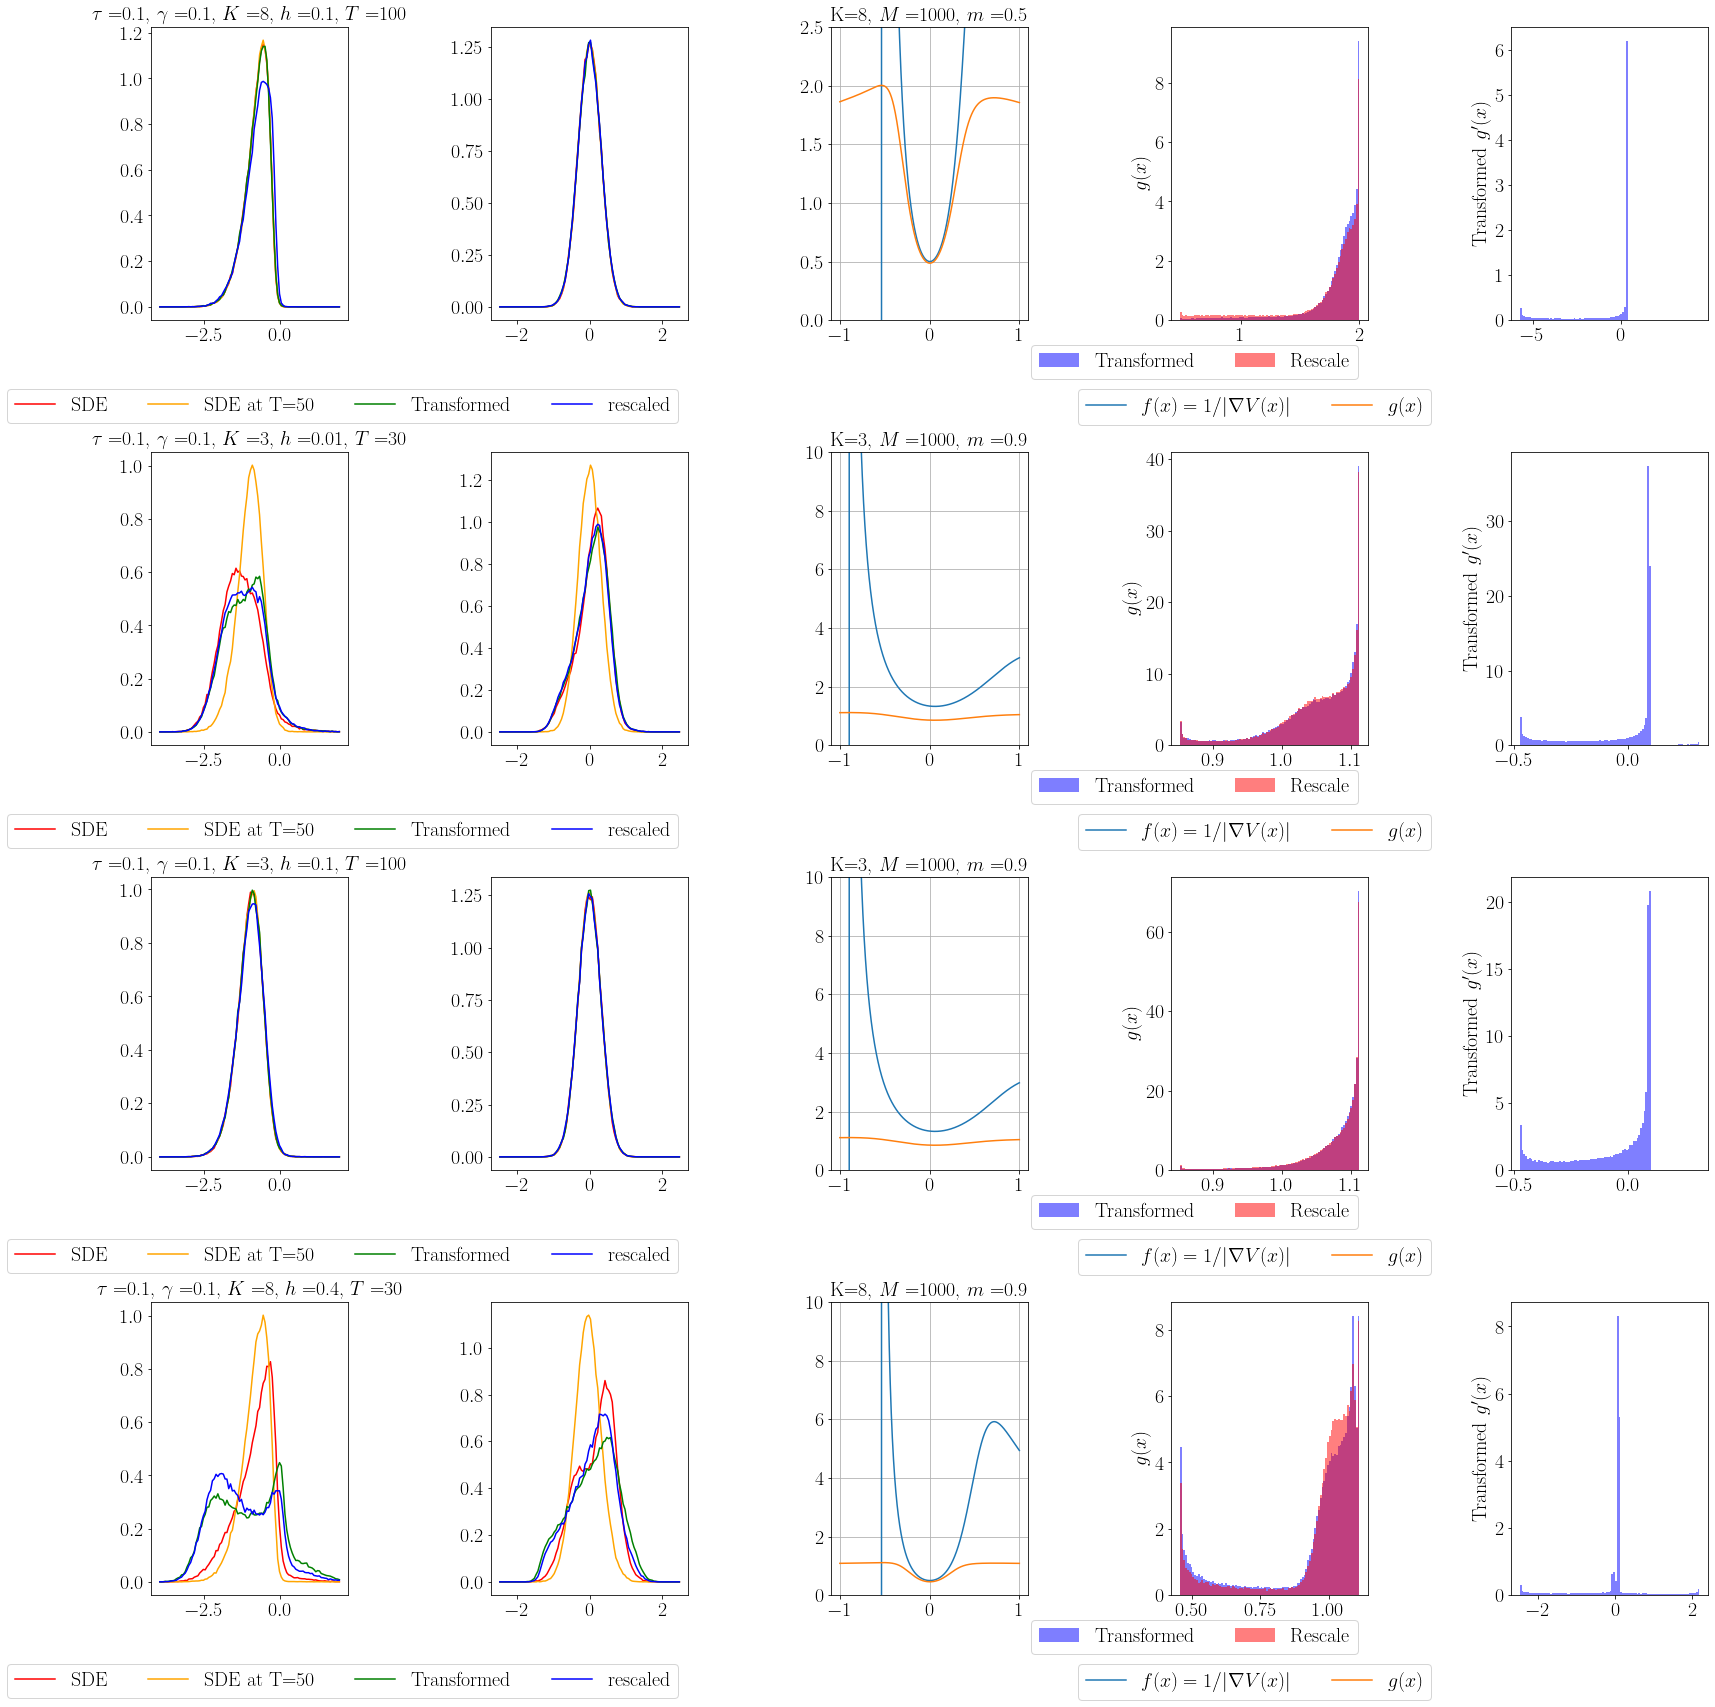

In [85]:

fig, (axs)= plt.subplots(4, 5,figsize=(25,25))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.tight_layout(pad=5)

## Plot the bounded function
mu = np.linspace(-1.,1,10000)
def getgplot(x,M,m,K):
    fx=K*np.exp(K*x)/np.power((np.exp(K*x)+1),2)+0.2*x
    res = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return res

def getfplot(x,M,m,K):
    fx = K*np.exp(K*x)/np.power((np.exp(K*x)+1),2)+0.2*x
    return 1/fx

b_q1=-4
b_q2=2
b_p=2.5

############################################################################################
# Example 1: ###############################################################################
############################################################################################
i=0
tau, gamma, K, h, T, M, m = tau1, gamma1, K1, h, T1, M1, m1
df_noada = df_noada1
df_noada_T50 = df_noada_T501
df_transfo = df_transfo1
df_rescale = df_rescale1

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", $T=$"+str(T))


count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,M,m,K),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,M,m,K),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,2.5])
axs[i,2].grid()

#########################################################################################################################################################
# Example 2: ############################################################################################################################################
#############################################################################################################################################################
i=1
tau, gamma, K, h, T, M, m = tau2, gamma2, K2, h2, T2, M2, m2
df_noada = df_noada2
df_noada_T50 = df_noada_T502
df_transfo = df_transfo2
df_rescale = df_rescale2

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", $T=$"+str(T))


count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,M,m,K),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,M,m,K),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,10])
axs[i,2].grid()

#########################################################################################################################################################
# Example 3: ############################################################################################################################################
#############################################################################################################################################################
i=2
tau, gamma, K, h, T, M, m = tau3, gamma3, K3, h3, T3, M3, m3
df_noada = df_noada3
df_noada_T50 = df_noada_T503
df_transfo = df_transfo3
df_rescale = df_rescale3

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", $T=$"+str(T))


count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")


################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,M,m,K),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,M,m,K),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,10])
axs[i,2].grid()


#########################################################################################################################################################
# Example 4: ############################################################################################################################################
#############################################################################################################################################################
i=3
tau, gamma, K, h, T, M, m = tau4, gamma4, K4, h4, T4, M4, m4
df_noada = df_noada4
df_noada_T50 = df_noada_T504
df_transfo = df_transfo4
df_rescale = df_rescale4

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", $T=$"+str(T))


count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")


################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,M,m,K),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,M,m,K),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,10])
axs[i,2].grid()